<a href="https://colab.research.google.com/github/anniepeacock/sar_notebooks/blob/main/SAR_Notebooks/Data_Import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data to Google Colab Notebooks**


<a name="s1"></a>
## Running the Notebook
- To run the content, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 

### Data Upload Options

1. Google Colab Choose Files Button
2. Google Colab Upload Button
3. AWS Public Bucket
4. wget direct data upload

 ## 1. Google Colab Choose Files Button
 
 
  - Upload files to Google Colab by running the cell below. A "Choose Files" button should appear. Select all the files in the downloaded folder. (Note: these will upload to a temporary "content" folder).
  - As a note, uploading larger files will take longer. If an upload error is encountered, try using Chrome instead of Safari. 

In [ ]:
from google.colab import files
uploaded = files.upload()

## 2. Google Colab Upload Button

If the routine above is calling an error, another (faster and less data volume restricted) upload option is to expand the folder system on the left (select the folder icon) and click the upload button (icon of an upward arrow over a sheet of paper) and select all the files in the downloaded folder to upload to your "content" folder. 

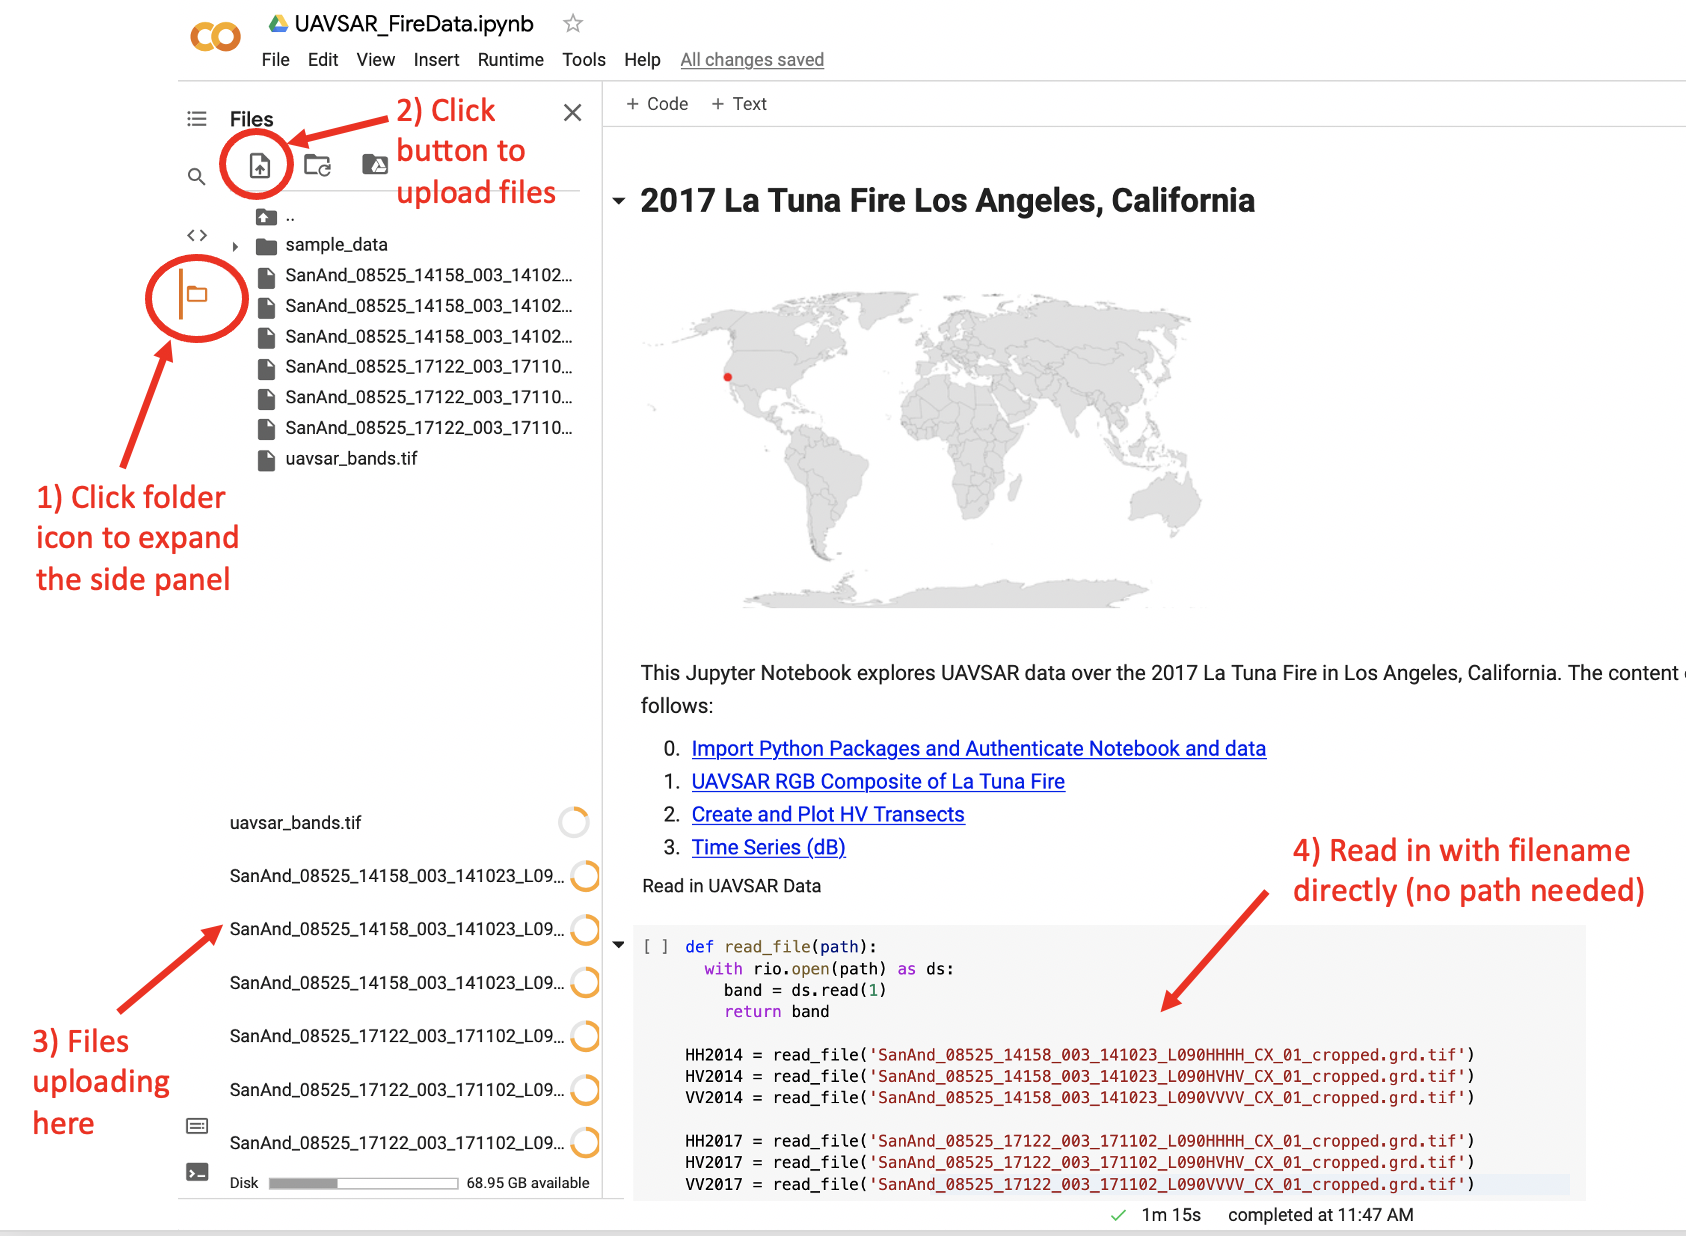

## 3. AWS Public Bucket

Another possibility is reading from an AWS bucket. For example, using the NISAR Cal/Val public bucket:


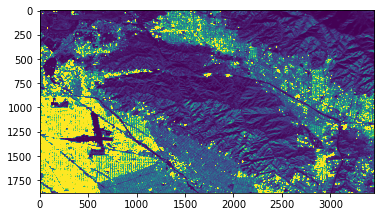

In [ ]:
bucketAddress = 'http://d3v1ox4ttgtjq7.cloudfront.net' #this address could be prettier with a JPL domain name
discipline = 'test/'
dbAddress = 'nisar-calval-dev-west2.c0v0gfvvm2xq.us-west-2.rds.amazonaws.com'

rasterName = '/vsicurl/' + bucketAddress + '/' + discipline + 'SanAnd_08525_14158_003_141023_L090HHHH_CX_01_cropped.grd.tif'

## Test read in file
!pip install rasterio --quiet
import rasterio as rio
import matplotlib.pyplot as plt

def read_file(path):
  with rio.open(path) as ds:
    band = ds.read(1)
    return band

ds = read_file(rasterName)
plt.imshow(ds, vmin=0,vmax=1)

##4. Wget Direct Data Upload

Another possiblity is to fetch data using the wget command. For example: 

In [ ]:
!wget https://uavsar.jpl.nasa.gov/DOWNLOAD_FILES/2016-Hurricane-Ida-RGBs/gulfco_09010_160313_HH_HV_VV_stack.tif

--2021-09-23 19:20:00--  https://uavsar.jpl.nasa.gov/DOWNLOAD_FILES/2016-Hurricane-Ida-RGBs/gulfco_09010_160313_HH_HV_VV_stack.tif
Resolving uavsar.jpl.nasa.gov (uavsar.jpl.nasa.gov)... 137.78.249.121
Connecting to uavsar.jpl.nasa.gov (uavsar.jpl.nasa.gov)|137.78.249.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245498361 (1.2G) [image/tiff]
Saving to: ‘gulfco_09010_160313_HH_HV_VV_stack.tif’

gulfco_09010_160313 100%[===================>]   1.16G  58.0MB/s    in 22s     

2021-09-23 19:20:22 (55.2 MB/s) - ‘gulfco_09010_160313_HH_HV_VV_stack.tif’ saved [1245498361/1245498361]



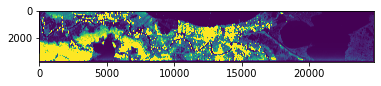

In [ ]:
## Test read in file
gulfco = read_file('gulfco_09010_160313_HH_HV_VV_stack.tif')
plt.imshow(gulfco, vmin=0, vmax=1)